In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
import numpy as np

In [2]:
# HIDDEN
ontime = Table.read_table('airline_ontime.csv')
ua = ontime.where('Carrier', 'UA').select(1)

We know that the mean is the balance point of the histogram. Unlike the mean, the SD is usually not easy to identify by looking at the histogram. 

However, there is one shape of distribution for which the SD is almost as clearly identifiable as the mean. This section examines that shape, as it appears frequently in probability histograms and also in many histograms of data.  

### The SD and the bell curve
The table ``births`` contains data on over 1,000 babies born at a hospital in the Bay Area. The columns contain several variables: the baby's birth weight in ounces; the number of gestational days; the mother's age in years, height in inches, and pregnancy weight in pounds; and a record of whether she smoked or not.

In [3]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


The mothers' heights have a mean of 64 inches and an SD of 2.5 inches. Unlike the heights of the basketball players, the mothers' heights are distributed fairly symmetrically about the mean in a bell-shaped curve.

In [4]:
heights = births.column('Maternal Height')
mean_height = np.round(np.mean(heights), 1)
mean_height

64.0

In [5]:
sd_height = np.round(np.std(heights), 1)
sd_height

2.5

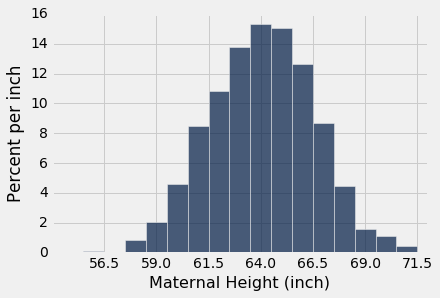

In [6]:
births.hist('Maternal Height', bins=np.arange(55.5, 72.5, 1), unit='inch')
positions = np.arange(-3, 3.1, 1)*sd_height + mean_height
_ = plots.xticks(positions)

The last two lines of code in the cell above change the labeling of the horizontal axis. Now, the labels correspond to "average $\pm$ $z$ SDs" for $z = 0, \pm 1, \pm 2$, and $\pm 3$. Because of the shape of the distribution, the "center" has an unambiguous meaning and is clearly visible at 64.

To see how the SD is related to the curve, start at the top of the curve and look towards the right. Notice that there is a place where the curve changes from looking like an "upside-down cup" to a "right-way-up cup"; formally, the curve has a point of inflection. That point is one SD above average. It is the point $z=1$, which is "average plus 1 SD" = 66.5 inches.

Symmetrically on the left-hand side of the mean, the point of inflection is at $z=-1$, that is, "average minus 1 SD" = 61.5 inches. 

**How to spot the SD on a bell-shaped curve:**
For bell-shaped distributions, the SD is the distance between the mean and the points of inflection on either side.

### Bell-shaped probability histograms
The reason for studying bell-shaped curves is not just that they appear as some distributions of data, but that they appear as approximations to probability histograms of sample averages. 

We have seen this phenomenon already, in the example about estimating the total number of aircraft. Recall that we simulated random samples of size 30 drawn with replacement from the serial numbers 1, 2, 3, ..., 300, and computed two different quantities: the largest of the 30 numbers observed, and twice the average of the 30 numbers. Here are the generated histograms.

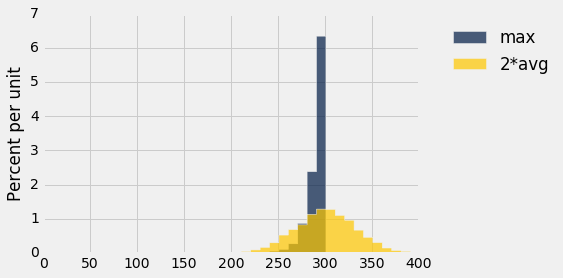

In [7]:
N = 300
sample_size = 30
repetitions = 5000

serialno = Table().with_column('serial number', np.arange(1, N+1))

new_est = Table(['i', 'max', '2*avg'])

for i in np.arange(repetitions):
    sample = serialno.sample(sample_size, with_replacement=True)
    new_est.append([i, max(sample.column(0)), 2 * np.average(sample.column(0))])
    
every_ten = np.arange(1, N+100, 10)
new_est.select(['max', '2*avg']).hist(bins=every_ten)

We observed that the distribution of "twice the sample average" is roughly symmetric; now let's also observe that it is roughly bell-shaped. 

If the distribution of "twice the average" is bell-shaped, so is the distribution of the average. Here is the distribution of the average of a sample of size 30 drawn from the numbers 1, 2, 3, ..., 300. The number of replications of the sampling procedure is large, so it is safe to assume that the empirical histogram resembles the probability histogram of the sample average.

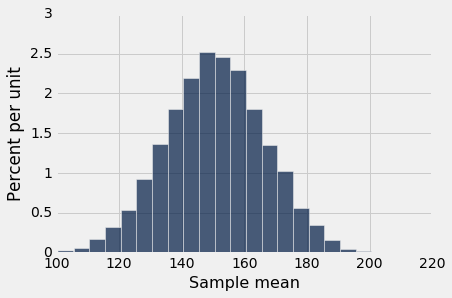

In [8]:
sample_means = Table(['Sample mean'])

for i in np.arange(repetitions):
    sample = serialno.sample(sample_size, with_replacement=True)
    sample_means.append([np.average(sample.column(0))])

every_five = np.arange(100.5, 200.6, 5)
sample_means.hist(bins=every_five)

We can draw this curve with a red bell-shaped curve superposed. This curve is generated from the mean and standard deviation of the sample means. Don't worry about the code that draws the curve; just focus on the diagram itself.

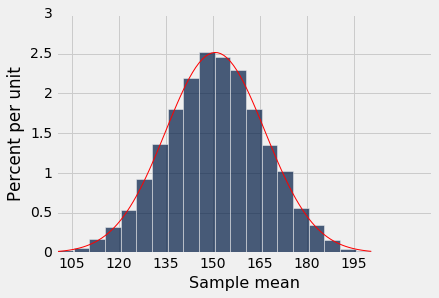

In [9]:
# Import a module of standard statistical functions
from scipy import stats

sample_means.hist(bins=every_five)
means = sample_means['Sample mean']
m = np.mean(means)
s = np.std(means)
x = np.arange(100.5, 200.6, 1)
plots.plot(x, stats.norm.pdf(x, m, s), color='r', lw=1)
positions = np.arange(-3, 3.1, 1)*15 + 150
_ = plots.xticks(positions, [int(y) for y in positions])

Since all the numbers drawn are between 1 and 300, we expect the sample mean to be around 150, which is where the histogram is centered.

Can you guess what the SD is? Run your eye along the curve till you feel you are close to the point of inflection to the right of center. If you guessed that the point is at about 165, you're correct – it's between 165 and 166 and symmetrically between 134 and 135 to the left of center.

### The probability histogram of a random sample average 

What is notable about this is not just that we can spot the SD, but that the probability distribution of the statistic is bell-shaped in the first place. There is a remarkable piece of mathematics called the **Central Limit Theorem** that shows that the distribution of the average of a large random sample will be roughly normal, *no matter what the distribution of the population from which the sample is drawn*.

In our example about serial numbers, each of the 300 serial numbers is equally likely to be drawn each time, so the distribution of the population is uniform and the probability histogram looks like a brick.

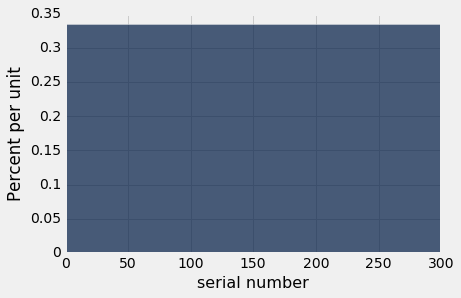

In [10]:
serialno.hist(bins=np.arange(0.5, 300.5, 1))

Let's test out the Central Limit Theorem by drawing samples from quite a different distribution. Here is the histogram of over 37,000 flight delay times in the table ``ua``. It looks nothing like the uniform distribution above.

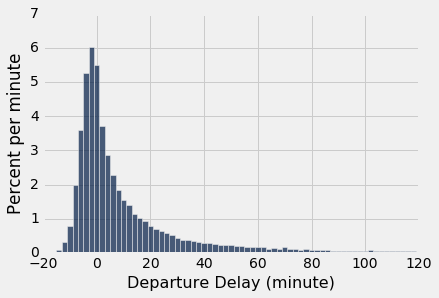

In [11]:
plotrange = np.arange(-15, 121, 2)
ua.hist(bins=plotrange, unit='minute')

We will now look at the probability distribution of the average of 625 flight times drawn at random from this population. The draws will be made with replacement, as they were in the example about serial numbers.

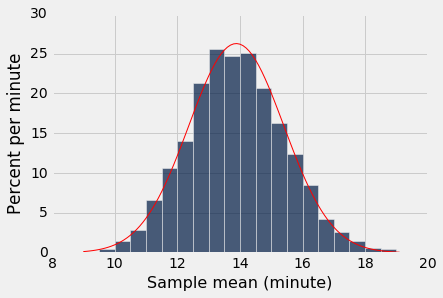

In [12]:
sample_size = 625

sample_means = Table(['Sample mean'])

for i in np.arange(repetitions):
    sample = ua.sample(sample_size, with_replacement=True)
    sample_means.append([np.average(sample.column(0))])

sample_means.hist(bins=np.arange(9, 19.1, 0.5), unit='minute')

# Draw a red bell-shaped curve from the mean and SD of the sample means
means = sample_means['Sample mean']
m = np.mean(means)
s = np.std(means)
x = np.arange(9, 19.1, 0.1)
_ = plots.plot(x, stats.norm.pdf(x, np.mean(ua[0]), np.std(ua[0])/25), color='r', lw=1)

The probabilities for the sample average are roughly bell-shaped, consistent with the Cenral Limit Theorem. 

The average delay time of all the flights in the population is about 14 minutes, which is where the histogram is centered. To spot the SD, it will help to note that the bars are half a minute wide. By eye, the points of inflection look to be about three bars away from the center. So we would guess that the SD is about 1.5 minutes, and in fact that is not far from the exact value.

What is the exact value? We will answer that question later in the term. Remarkably, it can be calculated easily based on the sample size and the SD of the population, without doing any simulations at all.

For now, here is the main point to note.

### Second main reason for using the SD to measure spread
For a large random sample, the probability distribution of the sample average will be roughly bell-shaped, with a mean and SD that can be easily identified, no matter what the distribution of the population from which the sample is drawn.

### The standard normal curve
The bell-shaped curves above look essentially all the same apart from the labels that we have placed on the horizontal axes. Indeed, there is really just one basic curve from which all of these curves can be drawn just by relabeling the axes appropriately. 

To draw that basic curve, we will use the units into which we can convert every list: standard units. The resulting curve is therefore called the *standard normal curve*. 

The standard normal curve has an impressive equation. But for now, it is best to think of it as a smoothed version of a histogram of a variable that has been measured in standard units.

$$
\phi(z) = {\frac{1}{\sqrt{2 \pi}}} e^{-\frac{1}{2}z^2}, ~~ -\infty < z < \infty
$$

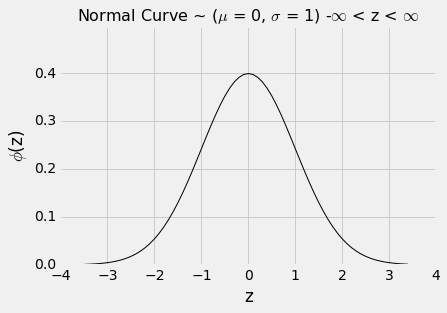

In [23]:
# The standard normal probability density function (pdf)

plot_normal_cdf()

As always when you examine a new histogram, start by looking at the horizontal axis. On the horizontal axis of the standard normal curve, the values are standard units. Here are some properties of the curve. Some are apparent by observation, and others require a considerable amount of mathematics to establish.

- The total area under the curve is 1. So you can think of it as a histogram drawn to the density scale.

- The curve is symmetric about 0. So if a variable has this distribution, its mean and median are both 0.

- The points of inflection of the curve are at -1 and +1. 

- If a variable has this distribution, its SD is 1. The normal curve is one of the very few distributions that has an SD so clearly identifiable on the histogram.

Since we are thinking of the curve as a smoothed histogram, we will want to represent proportions of the total amount of data by areas under the curve. Areas under smooth curves are often found by calculus, using a method called integration. It is a fact of mathematics, however, that the standard normal curve cannot be integrated in any of the usual ways of calculus. Therefore, areas under the curve have to be approximated. That is why almost all statistics textbooks carry tables of areas under the normal curve. It is also why all statistical systems, including the ``stats`` module of Python, include methods that provide excellent approximations to those areas.

### Areas under the normal curve
**The standard normal cumulative distribution function (cdf)**

The fundamental function for finding areas under the normal curve is ``stats.norm.cdf``. It takes a numerical argument and returns all the area under the curve to the left of that number. Formally, it is called the "cumulative distribution function" of the standard normal curve. That rather unwieldy mouthful is abbreviated as cdf.

Let us use this function to find the area to the left of $z=1$ under the standard normal curve.

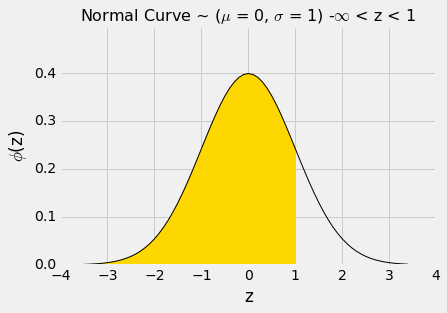

In [22]:
# Area under the standard normal curve, below 1

plot_normal_cdf(1)

In [15]:
stats.norm.cdf(1)

0.84134474606854293

That's about 84%. We can now use the symmetry of the curve and the fact that the total area under the curve is 1 to find other areas.

For example, the area to the right of $z=1$ is about 100% - 84% = 16%.

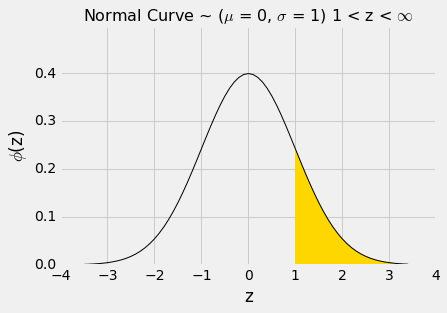

In [16]:
# Area under the standard normal curve, above 1

plot_normal_cdf(lbound=1)

In [17]:
1 - stats.norm.cdf(1)

0.15865525393145707

The area between $z=-1$ and $z=1$ can be computed in several different ways. 

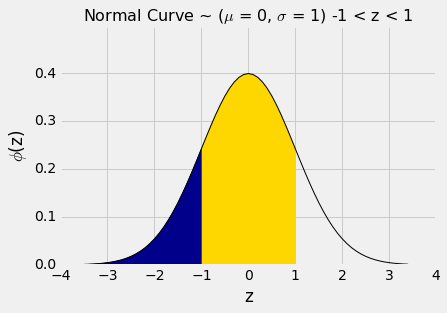

In [18]:
# Area under the standard normal curve, between -1 and 1

plot_normal_cdf(1, lbound=-1)

For example, we can calculate the area as "100% - two equal tails", which works out to roughly 100% - 2x16% = 68%.

Or we could note that the area between $z=1$ and $z=-1$ is equal to all the area to the left of $z=1$, minus all the area to the left of $z=-1$.

In [19]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.68268949213708585

By a similar calculation, we see that the area between $-2$ and 2 is about 95%.

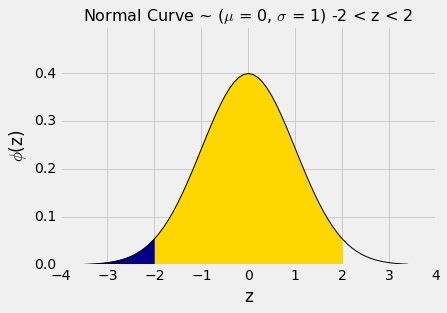

In [20]:
# Area under the standard normal curve, between -2 and 2

plot_normal_cdf(2, lbound=-2)

In [21]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.95449973610364158

In other words, if a histogram is roughly bell shaped, the proportion of data in the range "average $\pm$ 2 SDs" is about 95%. 

That is quite a bit more than Chebychev's lower bound of 75%. Chebychev's bound is weaker because it has to work for all distributions. If we know that a distribution is normal, we have good approximations to the proportions, not just bounds.

The table below compares what we know about all distributions and about normal distributions. Notice that Chebychev's bound is not very illuminating when $z=1$.

| Percent in Range   | All Distributions   | Normal Distribution |
| :---------------   | :----------------   | :------------------ |
|average $\pm$ 1 SD  | at least 0%         | about 68%           |
|average $\pm$ 2 SDs | at least 75%        | about 95%           |
|average $\pm$ 3 SDs | at least 88.888...% | about 99.73%        |